# Packages Installs, imports, and presets

In [287]:
from scapy.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from collections import defaultdict
import os

In [288]:
df_train= pd.read_parquet('data/df_train_statistics.parquet')
df_validation = pd.read_parquet('data/df_validation_statistics.parquet')
df_test=pd.read_parquet('data/df_test_statistics.parquet')

In [293]:
df_train

,flow,src,src_port,dst,dst_port,feduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,...,fAvgSegmentSize,fAvgBytesPerBulk,fAvgPacketsPerBulk,fAvgBulkRate,bAvgSegmentSize,bAvgBytesPerBulk,bAvgPacketsPerBulk,bAvgBulkRate,label,computation_time
0,1_192.168.1.13_192.168.1.29_2404_46773_TCP_c_r...,192.168.1.13,0,192.168.1.29,0,0.002186,5,3,1040,624,...,168.0,346.666667,3.000000,0.666667,168.0,0,2.000000,0.444444,0,0.206112
0,1_192.168.1.20_192.168.1.13_49259_2404_TCP_c_r...,192.168.1.20,0,192.168.1.13,0,0.816466,1731,1811,360048,376688,...,168.0,1671.668329,215.382438,0.489081,168.0,0,225.518498,0.512098,1,10.485839
0,1_192.168.1.20_192.168.1.13_49403_2404_TCP_c_c...,192.168.1.20,0,192.168.1.13,0,0.546181,1250,1409,260000,293072,...,168.0,1247.533722,208.411200,0.472872,168.0,0,232.882186,0.528396,1,7.014691
0,1_192.168.1.20_192.168.1.13_49528_2404_TCP_c_s...,192.168.1.20,0,192.168.1.13,0,0.542043,1329,1385,276432,288080,...,168.0,1236.796822,223.506396,0.490645,168.0,0,232.552347,0.510503,1,7.164718
0,1_192.168.1.20_192.168.1.13_49752_2404_TCP_c_r...,192.168.1.20,0,192.168.1.13,0,0.702678,1692,1771,351936,368368,...,168.0,1566.954753,224.598700,0.488959,168.0,0,235.254094,0.512157,1,10.087898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2_192.168.1.29_192.168.1.22_46737_2404_TCP_c_r...,192.168.1.29,0,192.168.1.22,0,0.001793,3,7,624,1456,...,168.0,312.000000,2.000000,0.363636,168.0,0,4.000000,0.727273,3,0.354394
0,3_192.168.1.27_192.168.1.26_40733_2404_TCP_c_r...,192.168.1.27,0,192.168.1.26,0,0.001781,3,7,624,1456,...,168.0,312.000000,2.000000,0.363636,168.0,0,4.000000,0.727273,3,0.354912
0,3_192.168.1.28_192.168.1.21_33761_2404_TCP_c_r...,192.168.1.28,0,192.168.1.21,0,0.001233,3,4,624,832,...,168.0,312.000000,2.000000,0.500000,168.0,0,2.500000,0.625000,7,0.347873
0,3_192.168.1.29_192.168.1.13_37781_2404_TCP_c_r...,192.168.1.29,0,192.168.1.13,0,0.002166,3,9,624,1872,...,168.0,312.000000,2.000000,0.307692,168.0,0,5.000000,0.769231,4,0.355929


In [294]:
import sklearn

In [308]:
df_test=df_test.drop('flow',axis=1)
df_validation=df_validation.drop('flow',axis=1)
df_train=df_train.drop('flow',axis=1)



KeyError: "['flow'] not found in axis"

In [309]:
df_train.columns

Index(['src', 'src_port', 'dst', 'dst_port', 'feduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fiat', 'total_biat', 'min_fiat',
       'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat',
       'std_fiat', 'std_biat', 'fpsh_cnt', 'bpsh_cnt', 'furg_cnt', 'burg_cnt',
       'total_fhlen', 'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond',
       'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowpktl',
       'max_flowpktl', 'mean_flowpktl', 'std_flowpktl', 'min_flowiat',
       'max_flowiat', 'mean_flowiat', 'std_flowiat', 'flow_fin', 'flow_syn',
       'flow_rst', 'flow_psh', 'flow_ack', 'flow_urg', 'flow_cwr', 'flow_ece',
       'downUpRatio', 'avgPacketSize', 'fAvgSegmentSize', 'fAvgBytesPerBulk',
       'fAvgPacketsPerBulk', 'fAvgBulkRate', 'bAvgSegmentSize',
       'bAvgBytesPerBulk', 'bAvgPacketsPerBulk', 'bA

In [310]:
import feature_engine
import feature_engine.encoding

In [298]:
tmp = df_train.dtypes
tmp.loc[tmp=='object']

src    object
dst    object
dtype: object

In [299]:
oe = feature_engine.encoding.OrdinalEncoder(encoding_method='arbitrary')

In [300]:
df_train[['src','dst']]

,src,dst
0,192.168.1.13,192.168.1.29
0,192.168.1.20,192.168.1.13
0,192.168.1.20,192.168.1.13
0,192.168.1.20,192.168.1.13
0,192.168.1.20,192.168.1.13
...,...,...
0,192.168.1.29,192.168.1.22
0,192.168.1.27,192.168.1.26
0,192.168.1.28,192.168.1.21
0,192.168.1.29,192.168.1.13


In [301]:
oe.fit(df_train[['src','dst']])
df_train[['src','dst']]=oe.transform(df_train[['src','dst']])

In [302]:
df_validation[['src','dst']]=oe.transform(df_validation[['src','dst']])
df_test[['src','dst']]=oe.transform(df_test[['src','dst']])

In [303]:
oe = feature_engine.encoding.OrdinalEncoder()

In [351]:
tmp = df_train.isnull().sum()
tmp.loc[tmp>0]

std_fpktl        7
std_bpktl        7
mean_fiat        7
mean_biat        7
std_fiat       731
std_biat         8
std_flowiat      7
dtype: int64

In [354]:
columns_with_nan_values = list(tmp.loc[tmp>0].index)

In [357]:
import feature_engine.imputation
mmi = feature_engine.imputation.MeanMedianImputer()
mmi.fit(df_train[columns_with_nan_values])

MeanMedianImputer()

In [358]:

df_train[columns_with_nan_values]=mmi.transform(df_train[columns_with_nan_values])
df_test[columns_with_nan_values]=mmi.transform(df_test[columns_with_nan_values])
df_validation[columns_with_nan_values]=mmi.transform(df_validation[columns_with_nan_values])

In [360]:
X_train = df_train.loc[:,df_train.columns != 'label']
y_train = df_train.loc[:,df_train.columns == 'label'].to_numpy().flatten()

In [361]:
X_test = df_test.loc[:,df_test.columns != 'label']
y_test = df_test.loc[:,df_test.columns == 'label'].to_numpy().flatten()

In [363]:
X_val = df_validation.loc[:,df_validation.columns != 'label']
y_val = df_validation.loc[:,df_validation.columns == 'label'].to_numpy().flatten()

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200)
AdaBoostClassifier(algorithm='SAMME', n_estimators=100)
DecisionTreeClassifier(criterion='entropy', max_depth=10)
           Model                                    Best Parameters  Accuracy  \
0  Random Forest  {'max_depth': 10, 'max_features': 'log2', 'n_e...  0.362731   
1       Adaboost        {'learning_rate': 1.0, 'n_estimators': 100}  0.323247   
2  Decision Tree          {'criterion': 'entropy', 'max_depth': 10}  0.269004   

   Precision    Recall                                   Confusion Matrix  
0   0.357369  0.312894  [[33, 0, 0, 97, 27, 5, 14, 79, 4, 0, 0], [0, 1...  
1   0.218188  0.198593  [[6, 0, 0, 130, 14, 0, 20, 89, 0, 0, 0], [0, 2...  
2   0.293848  0.288149  [[49, 0, 0, 79, 30, 21, 6, 59, 11, 2, 2], [0, ...  


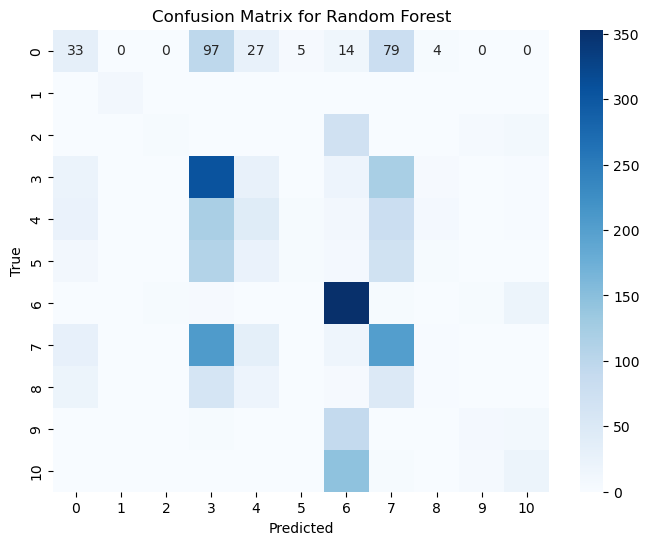

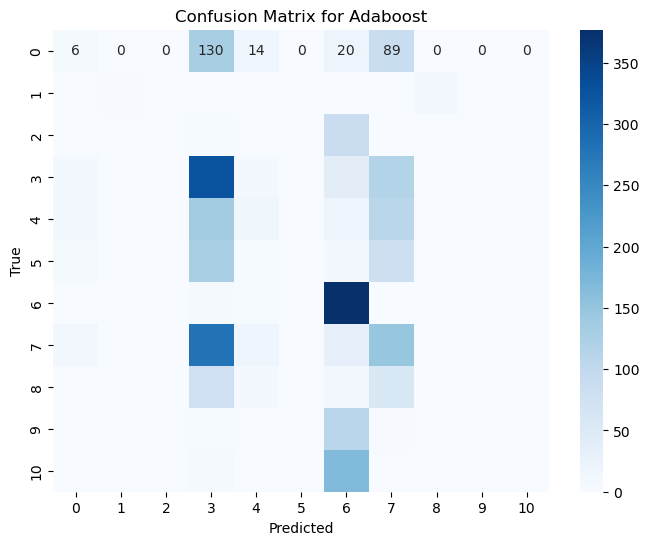

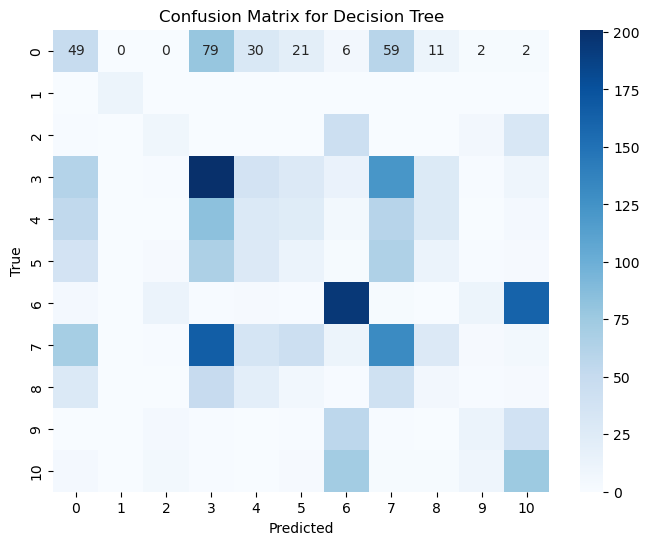

In [366]:
import pandas as pd
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare a list of models to compare with their corresponding hyperparameter grids
models = {
    # "Logistic Regression": (LogisticRegression(max_iter=1000), {
    #     'C': [0.1, 1, 10, 100],
    #     'solver': ['liblinear', 'saga']
    # }),
    # "Linear Discriminant Analysis": (LinearDiscriminantAnalysis(), {
    #     'solver': ['svd', 'lsqr', 'eigen']
    # }),
    # "Quadratic Discriminant Analysis": (QuadraticDiscriminantAnalysis(), {
    #     'reg_param': [0.0, 0.1, 0.5, 1.0]
    # }),

    # "Naive Bayes": (GaussianNB(), {
    #     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    # }),
    # "SVM": (SVC(probability=True), {
    #     'C': [0.1, 1, 10, 100],
    #     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    # }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30, 40, 50]
    }),
    "Adaboost": (AdaBoostClassifier(algorithm='SAMME'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0, 10.0]
    }),
    # "MLP": (MLPClassifier(max_iter=1000), {
    #     'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    #     'activation': ['tanh', 'relu'],
    #     'solver': ['sgd', 'adam'],
    #     'alpha': [0.0001, 0.001, 0.01]
    # }),
        "Decision Tree": (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50]
    }),
}

# Train and evaluate models using HalvingGridSearchCV
results = []

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=16)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(best_model)
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Confusion Matrix": cm
    })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Print the results
print(df_results)

# Plot confusion matrices for each model
for result in results:
    cm = result["Confusion Matrix"]
    model_name = result["Model"]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [367]:
display(df_results)

,Model,Best Parameters,Accuracy,Precision,Recall,Confusion Matrix
0,Random Forest,"{'max_depth': 10, 'max_features': 'log2', 'n_e...",0.362731,0.357369,0.312894,"[[33, 0, 0, 97, 27, 5, 14, 79, 4, 0, 0], [0, 1..."
1,Adaboost,"{'learning_rate': 1.0, 'n_estimators': 100}",0.323247,0.218188,0.198593,"[[6, 0, 0, 130, 14, 0, 20, 89, 0, 0, 0], [0, 2..."
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 10}",0.269004,0.293848,0.288149,"[[49, 0, 0, 79, 30, 21, 6, 59, 11, 2, 2], [0, ..."
